<a href="https://colab.research.google.com/github/SaptarshiChakra/Email_Spam_Classifier/blob/master/Email_spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [85]:
df = pd.read_csv("/content/drive/MyDrive/email spam classfier/spam.csv", encoding="latin-1")

In [86]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
286,ham,Ok..,NaN,NaN,NaN
2564,ham,"Under the sea, there lays a rock. In the rock,...",NaN,NaN,NaN
175,ham,Let me know when you've got the money so carlo...,NaN,NaN,NaN
177,ham,Turns out my friends are staying for the whole...,NaN,NaN,NaN
3363,ham,"Yo my trip got postponed, you still stocked up?",NaN,NaN,NaN


In [87]:
df.shape

(5572, 5)

In [88]:
# 1. Data Cleaning
# 2. Exploratory Data Analysis
# 3. Text preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

***DATA CLEANING***

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [90]:
# dropping the last 3 columns of the data set

df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [91]:
df.sample(5)

,v1,v2
5253,ham,Please tell me not all of my car keys are in y...
4843,spam,YOU HAVE WON! As a valued Vodafone customer ou...
2981,ham,"Tonight? Yeah, I'd be down for that"
4060,ham,"Aight I've been set free, think you could text..."
4890,ham,Its worse if if uses half way then stops. Its ...


In [92]:
df.rename(columns={
    'v1' : 'Target',
    'v2' : 'Text'
},inplace=True)
df.sample(5)

,Target,Text
2538,ham,The monthly amount is not that terrible and yo...
79,ham,Its not the same here. Still looking for a job...
1386,ham,All e best 4 ur exam later.
4210,ham,Oi when you gonna ring
3310,ham,HI DARLIN HOW WAS WORK DID U GET INTO TROUBLE?...


In [93]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [94]:
df.Target = encoder.fit_transform(df.Target)
df.sample(5)

,Target,Text
25,0,Just forced myself to eat a slice. I'm really ...
2003,0,S....s...india going to draw the series after ...
5436,0,Mode men or have you left.
1720,0,"Fighting with the world is easy, u either win ..."
4334,0,"Now u sound like manky scouse boy steve,like! ..."


In [95]:
df.isna().sum()

Target    0
Text      0
dtype: int64

In [96]:
df.duplicated().sum()

403

In [97]:
df.drop_duplicates(keep='first',inplace=True)
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [98]:
df.duplicated().sum()

0

In [99]:
df.shape

(5169, 2)

***EXPLORATORY DATA ANALYSIS***

In [100]:
df.Target.value_counts()

0    4516
1     653
Name: Target, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

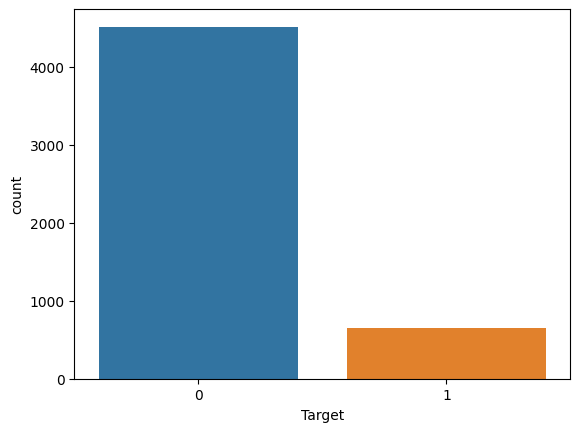

In [101]:
sn.countplot(x='Target' , data = df)

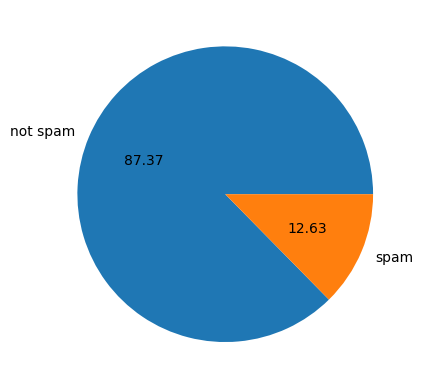

In [102]:
plt.pie(df['Target'].value_counts() , labels = ['not spam' , 'spam'] , autopct='%0.2f')
plt.show()

In [103]:
# Data is imbalance

In [104]:
# importing the natural language tool kit(nltk) library
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [105]:
# no ofcharaters in each text message
df['no_of_characters'] = df['Text'].apply(len)

In [106]:
# no of words
df['no_of_words']=df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head(5)

,Target,Text,no_of_characters,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [107]:
# no of sentences
df['no_of_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Target,Text,no_of_characters,no_of_words,no_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [108]:
arr = ['no_of_words','no_of_characters','no_of_sentences']
df[arr].describe()

,no_of_words,no_of_characters,no_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,18.455794,78.977945,1.965564
std,13.324758,58.236293,1.448541
min,1.000000,2.000000,1.000000
25%,9.000000,36.000000,1.000000
50%,15.000000,60.000000,1.000000
75%,26.000000,117.000000,2.000000
max,220.000000,910.000000,38.000000


In [109]:
# information about the non-spam messages
df[df.Target==0][arr].describe()

,no_of_words,no_of_characters,no_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,17.123782,70.459256,1.820195
std,13.493970,56.358207,1.383657
min,1.000000,2.000000,1.000000
25%,8.000000,34.000000,1.000000
50%,13.000000,52.000000,1.000000
75%,22.000000,90.000000,2.000000
max,220.000000,910.000000,38.000000


In [110]:
#information about the spam messages
df[df.Target==1][arr].describe()

,no_of_words,no_of_characters,no_of_sentences
count,653.000000,653.000000,653.000000
mean,27.667688,137.891271,2.970904
std,7.008418,30.137753,1.488425
min,2.000000,13.000000,1.000000
25%,25.000000,132.000000,2.000000
50%,29.000000,149.000000,3.000000
75%,32.000000,157.000000,4.000000
max,46.000000,224.000000,9.000000


<Axes: xlabel='no_of_characters', ylabel='Count'>

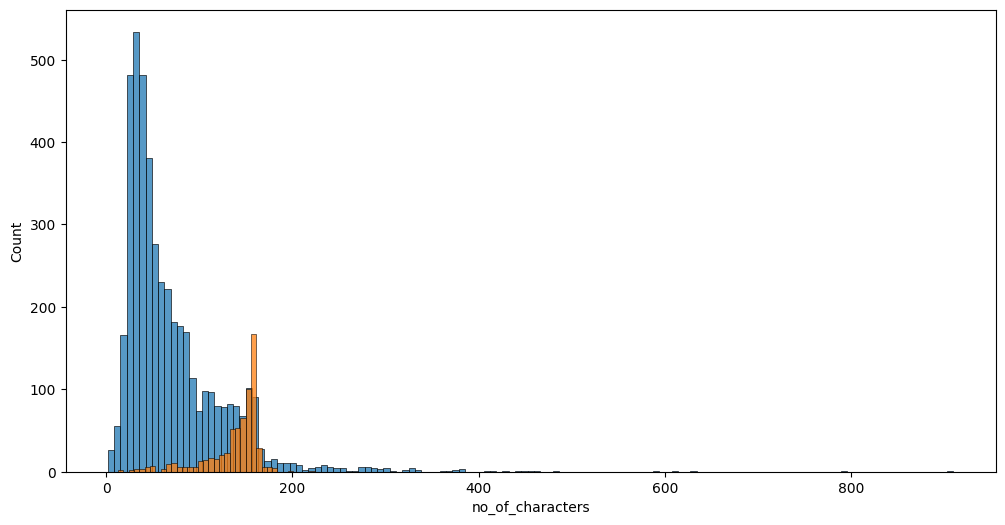

In [111]:
plt.figure(figsize=(12,6))
sn.histplot(df[df.Target==0]['no_of_characters'])
sn.histplot(df[df.Target==1]['no_of_characters'])

<Axes: xlabel='no_of_words', ylabel='Count'>

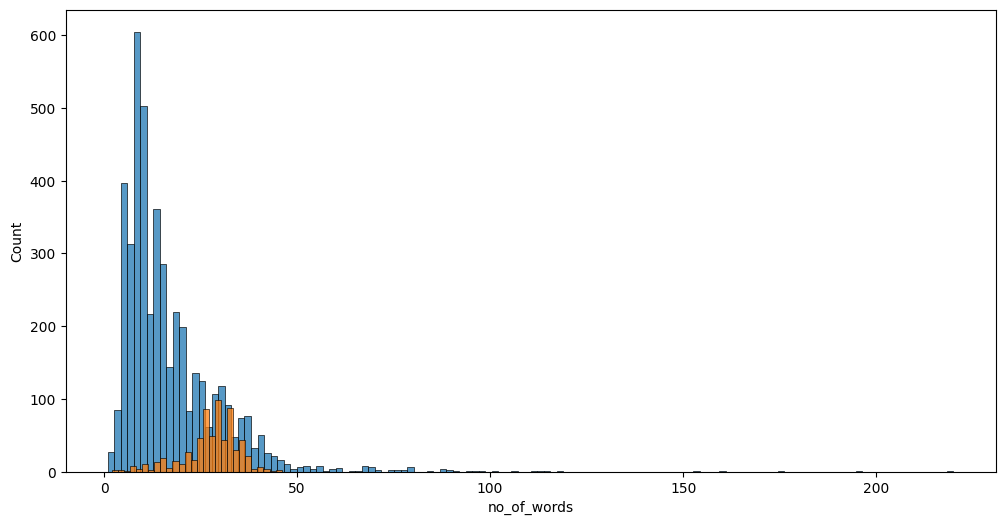

In [112]:
plt.figure(figsize=(12,6))
sn.histplot(df[df.Target==0]['no_of_words'])
sn.histplot(df[df.Target==1]['no_of_words'])

<Figure size 1200x600 with 0 Axes>

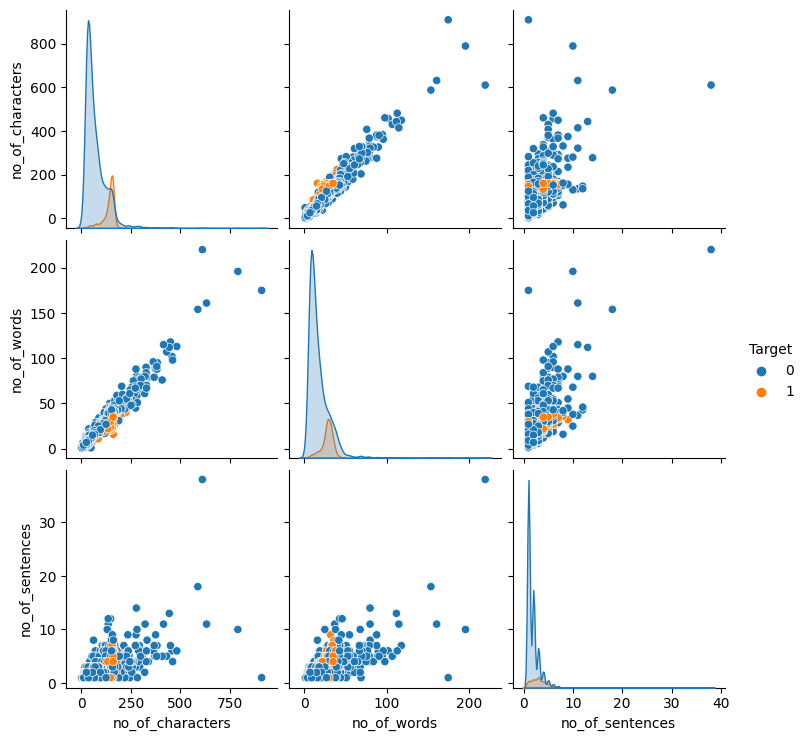

In [113]:
plt.figure(figsize=(12,6))
sn.pairplot(df,hue='Target')

<ipython-input-114-f014798502c9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  arr1 = df.corr()


<Axes: >

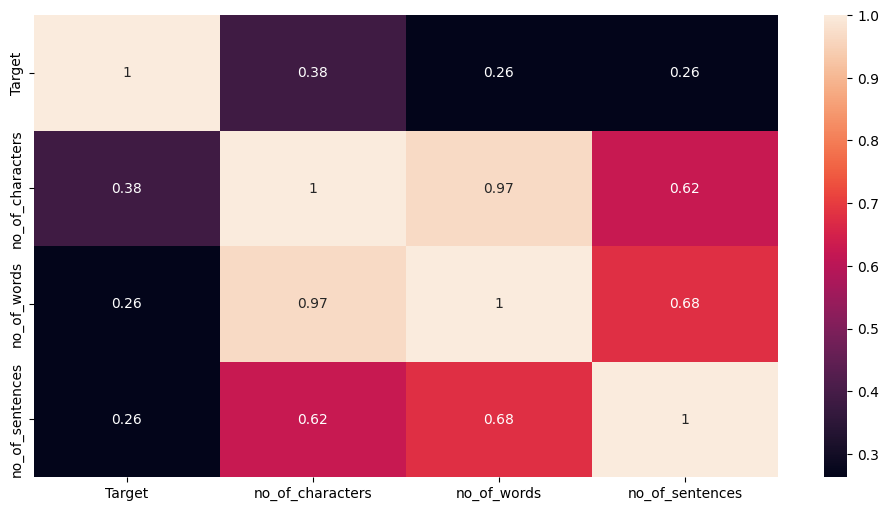

In [114]:
arr1 = df.corr()
plt.figure(figsize=(12,6))
sn.heatmap(arr1,annot=True)

***DATA PREPROCESSING***


*   Lower Case
*   Tokenizing

*   Removing special characters
*   Removing stop words and punctuation
*   Stemming









In [115]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [116]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [117]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [118]:
def transform(text):
  text = text.lower() # converting every characters to lower case
  text = nltk.word_tokenize(text) # tokenizing all the words in the text

  # removing the special characters from the text
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  return " ".join(text)

In [119]:
transform('Hello how are you lovely Saptarshi?')

'hello lovely saptarshi'

In [120]:
df['transformed_text'] = df['Text'].apply(transform)
df.head()

,Target,Text,no_of_characters,no_of_words,no_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though


In [121]:
# Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Hello how are you lovely Saptarshi?')

'hello how are you lovely saptarshi?'

In [122]:
def stemming (text):
  y=[]
  for i in text.split():
    y.append(ps.stem(text))
    return " ".join(y)

In [123]:
stemming('Hello how are you lovely Saptarshi?')

'hello how are you lovely saptarshi?'

In [124]:
df.transformed_text = df.transformed_text.apply(stemming)
# df.drop(['Texr'])
df.head()

,Target,Text,no_of_characters,no_of_words,no_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though


In [125]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500,min_font_size=10,background_color='white')

In [126]:
spam_wc = wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=' ')) # EXTRACTING ALL THE WORDS FROM THE SPAM ROWS AND CONCATINATING IT WITH THE HELP OG CAT FUNCTION

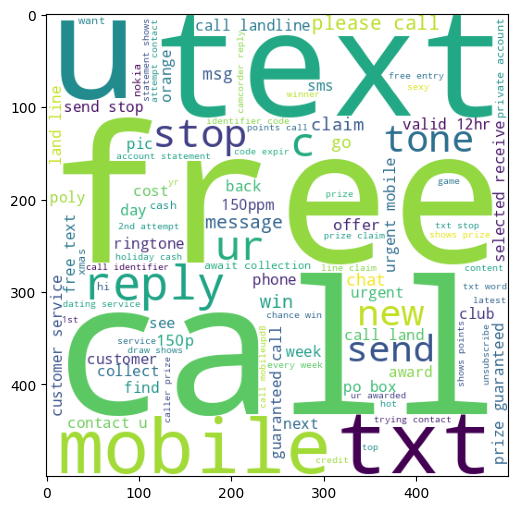

In [127]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [128]:
notspam_wc = wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=' ')) # EXTRACTING ALL THE WORDS FROM THE SPAM ROWS AND CONCATINATING IT WITH THE HELP OG CAT FUNCTION

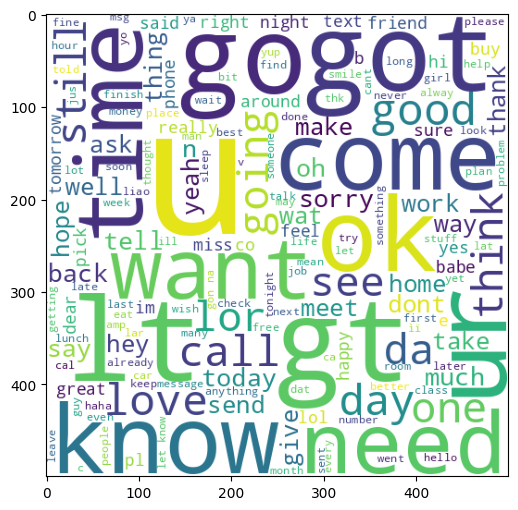

In [129]:
plt.figure(figsize=(15,6))
plt.imshow(notspam_wc)

In [130]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [131]:
len(spam_corpus)

9939

In [132]:
from collections import Counter
df1=pd.DataFrame(Counter(spam_corpus).most_common(30))
df1

,0,1
0,call,295
1,free,189
2,2,155
3,txt,132
4,u,119
5,ur,119
6,text,104
7,mobile,104
8,stop,104
9,4,97


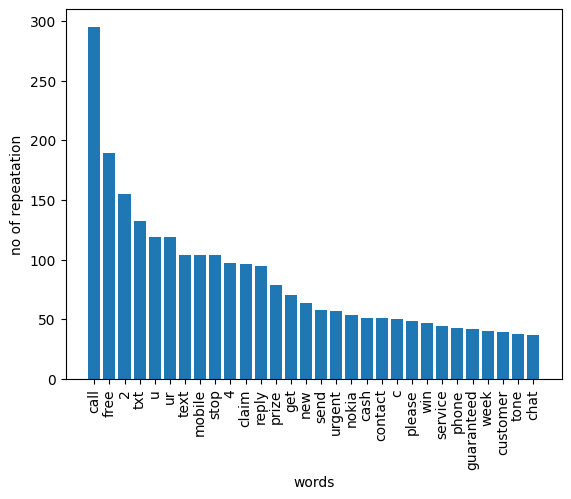

In [133]:
plt.bar(df1[0],df1[1])
plt.xlabel('words')
plt.ylabel('no of repeatation')
plt.xticks(rotation='vertical')
plt.show()

In [134]:
ham_corpus = []
for msg in df[df['Target'] == 0]['transformed_text'].tolist():
    if msg is not None:
        for word in msg.split():
            ham_corpus.append(word)

In [135]:
len(ham_corpus)

35399

In [136]:
df2=pd.DataFrame(Counter(ham_corpus).most_common(30))
df2

,0,1
0,u,893
1,get,295
2,gt,288
3,lt,287
4,2,284
5,go,252
6,got,236
7,know,225
8,ok,217
9,good,213


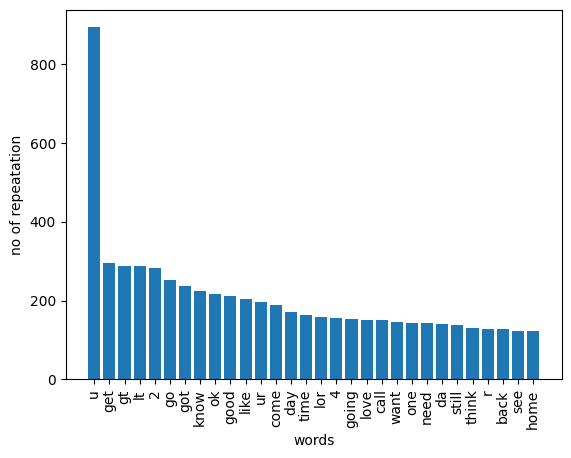

In [137]:
plt.bar(df2[0],df2[1])
plt.xlabel('words')
plt.ylabel('no of repeatation')
plt.xticks(rotation='vertical')
plt.show()

In [138]:
df.dropna(inplace=True)

In [139]:
df['transformed_text'].isna().sum()

0

***MODDEL BUILDING***

In [140]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [141]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [142]:
X.shape

(5160, 3000)

In [143]:
y = df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [145]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [146]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [147]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8798449612403101
[[800 106]
 [ 18 108]]
0.5046728971962616


In [166]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9748062015503876
[[906   0]
 [ 26 100]]
1.0


In [167]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9864341085271318
[[905   1]
 [ 13 113]]
0.9912280701754386


In [148]:
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [149]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [150]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [152]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [153]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9796511627906976, 1.0)

In [154]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print('------------------')
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print('\n')

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
------------------
Accuracy -  0.9796511627906976
Precision -  1.0


For  KN
------------------
Accuracy -  0.9224806201550387
Precision -  1.0


For  NB
------------------
Accuracy -  0.9748062015503876
Precision -  1.0


For  DT
------------------
Accuracy -  0.9437984496124031
Precision -  0.84


For  LR
------------------
Accuracy -  0.9583333333333334
Precision -  0.946236559139785


For  RF
------------------
Accuracy -  0.9709302325581395
Precision -  0.9897959183673469


For  AdaBoost
------------------
Accuracy -  0.9680232558139535
Precision -  0.9345794392523364


For  BgC
------------------
Accuracy -  0.9602713178294574
Precision -  0.8632478632478633


For  ETC
------------------
Accuracy -  0.9718992248062015
Precision -  0.9619047619047619


For  GBDT
------------------
Accuracy -  0.9534883720930233
Precision -  0.8979591836734694


For  xgb
------------------
Accuracy -  0.9641472868217055
Precision -  0.9158878504672897




In [155]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [156]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.979651,1.000000
2,NB,0.974806,1.000000
8,ETC,0.971899,0.961905
5,RF,0.970930,0.989796
6,AdaBoost,0.968023,0.934579
10,xgb,0.964147,0.915888
7,BgC,0.960271,0.863248
4,LR,0.958333,0.946237
9,GBDT,0.953488,0.897959
3,DT,0.943798,0.840000


In [157]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.979651
1,NB,Accuracy,0.974806
2,ETC,Accuracy,0.971899
3,RF,Accuracy,0.970930
4,AdaBoost,Accuracy,0.968023
5,xgb,Accuracy,0.964147
6,BgC,Accuracy,0.960271
7,LR,Accuracy,0.958333
8,GBDT,Accuracy,0.953488
9,DT,Accuracy,0.943798


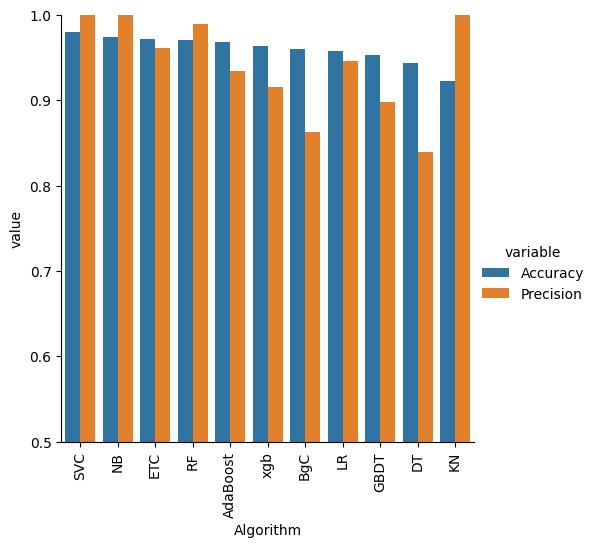

In [158]:
sn.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [168]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [169]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [170]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [171]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [172]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [173]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.979651,1.000000,0.979651,1.000000,0.979651,1.000000,0.979651,1.000000
1,NB,0.974806,1.000000,0.974806,1.000000,0.974806,1.000000,0.974806,1.000000
2,ETC,0.971899,0.961905,0.971899,0.961905,0.971899,0.961905,0.971899,0.961905
3,RF,0.970930,0.989796,0.970930,0.989796,0.970930,0.989796,0.970930,0.989796
4,AdaBoost,0.968023,0.934579,0.968023,0.934579,0.968023,0.934579,0.968023,0.934579
5,xgb,0.964147,0.915888,0.964147,0.915888,0.964147,0.915888,0.964147,0.915888
6,BgC,0.960271,0.863248,0.960271,0.863248,0.960271,0.863248,0.960271,0.863248
7,LR,0.958333,0.946237,0.958333,0.946237,0.958333,0.946237,0.958333,0.946237
8,GBDT,0.953488,0.897959,0.953488,0.897959,0.953488,0.897959,0.953488,0.897959
9,DT,0.943798,0.840000,0.943798,0.840000,0.943798,0.840000,0.943798,0.840000


In [159]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [160]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [161]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [174]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9844961240310077
Precision 1.0


In [163]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [175]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9874031007751938
Precision 0.991304347826087


In [176]:
import pickle
pickle.dump(tfidf,open('/content/vectorizer.pkl','wb'))
pickle.dump(mnb , open('/content/model.pkl','wb'))